# Introduction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

Also, we have to determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/housetrain.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = data.drop('Id',axis=1)

In [5]:
df.shape

(1460, 80)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# Categotical columns
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# Numeric columns
df.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# Sales column
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

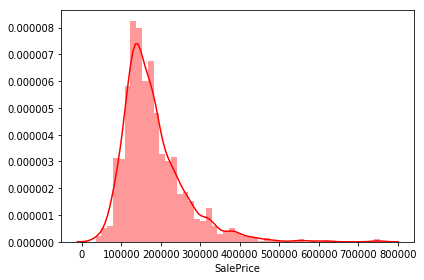

In [12]:
plt.figure()
sns.distplot(df['SalePrice'],color='r')

plt.tight_layout()

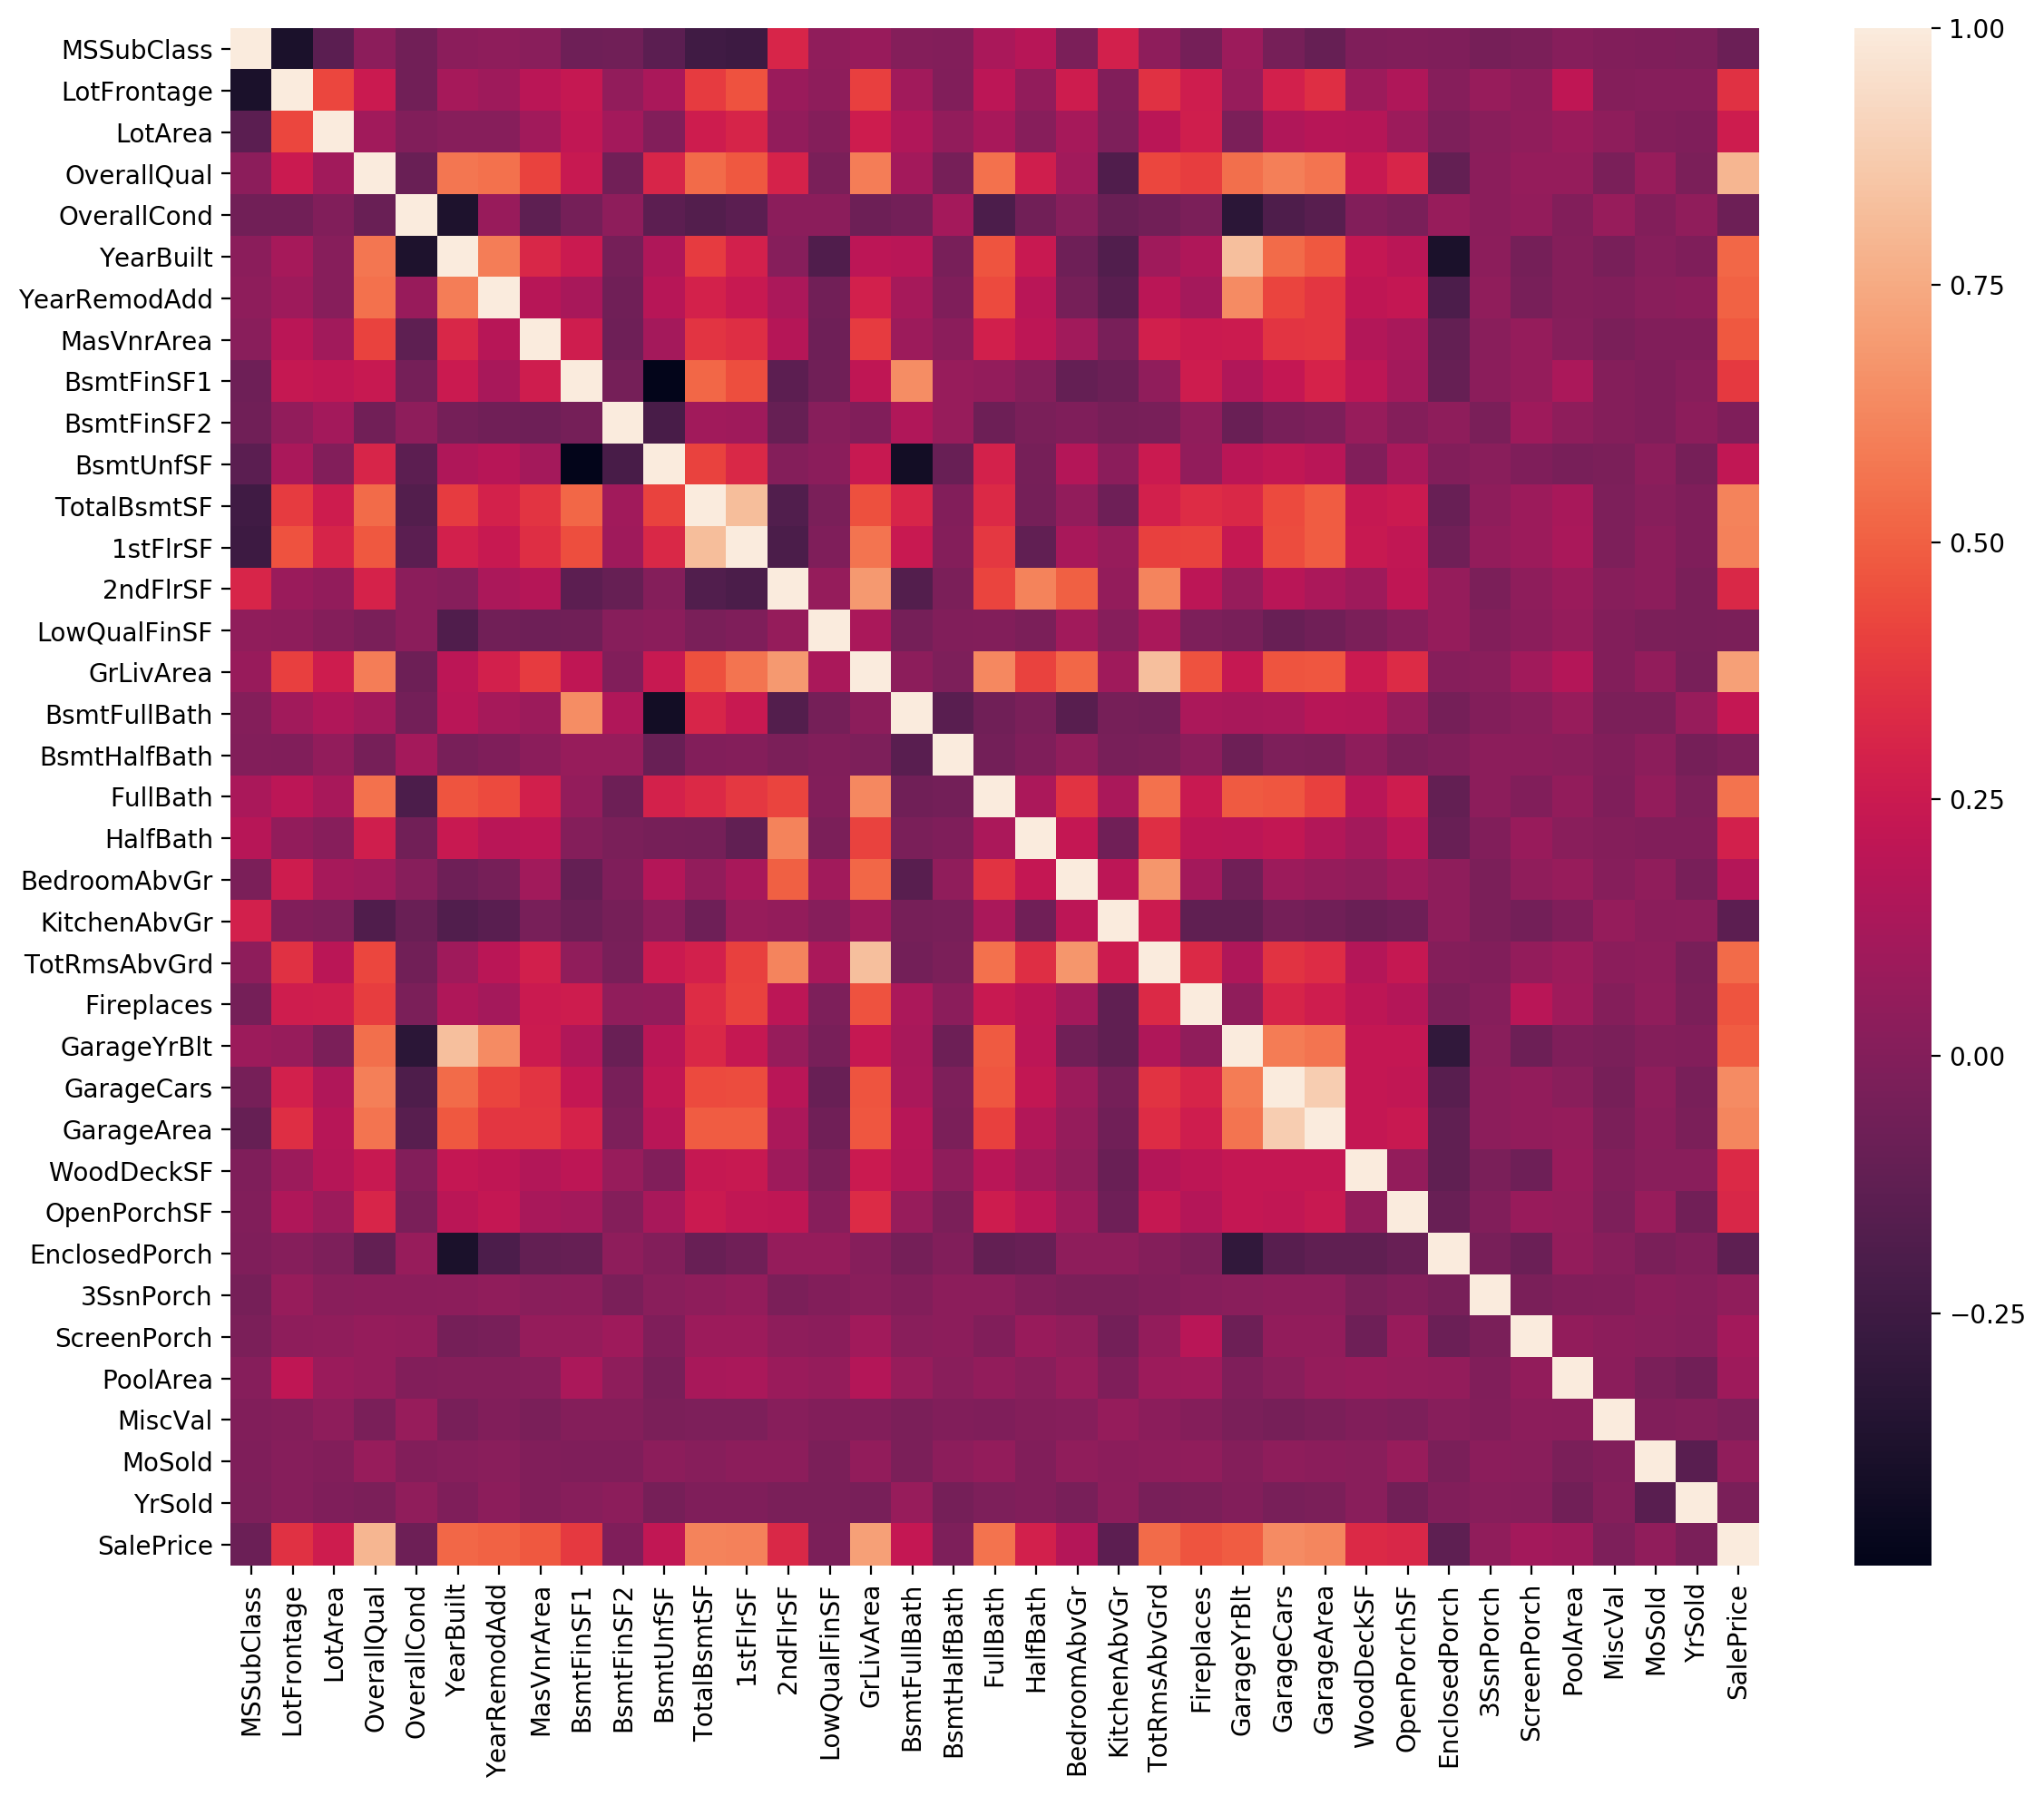

In [13]:
# Since there a lot of numerical columns it is not easy to understand which variables are important so
# we will use the correlation matrix to solve this issue
plt.figure(figsize=(12,10),dpi=200)
sns.heatmap(df.corr())

plt.tight_layout()

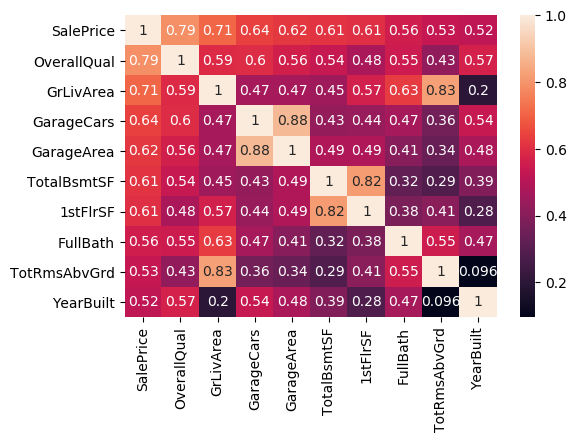

In [14]:
# sales price correlation matrix

n = 10 # number of variables which have the highest correlation with 'Sales price'

corrmat = df.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
plt.figure(dpi=100)
sns.heatmap(df[cols].corr(),annot=True)

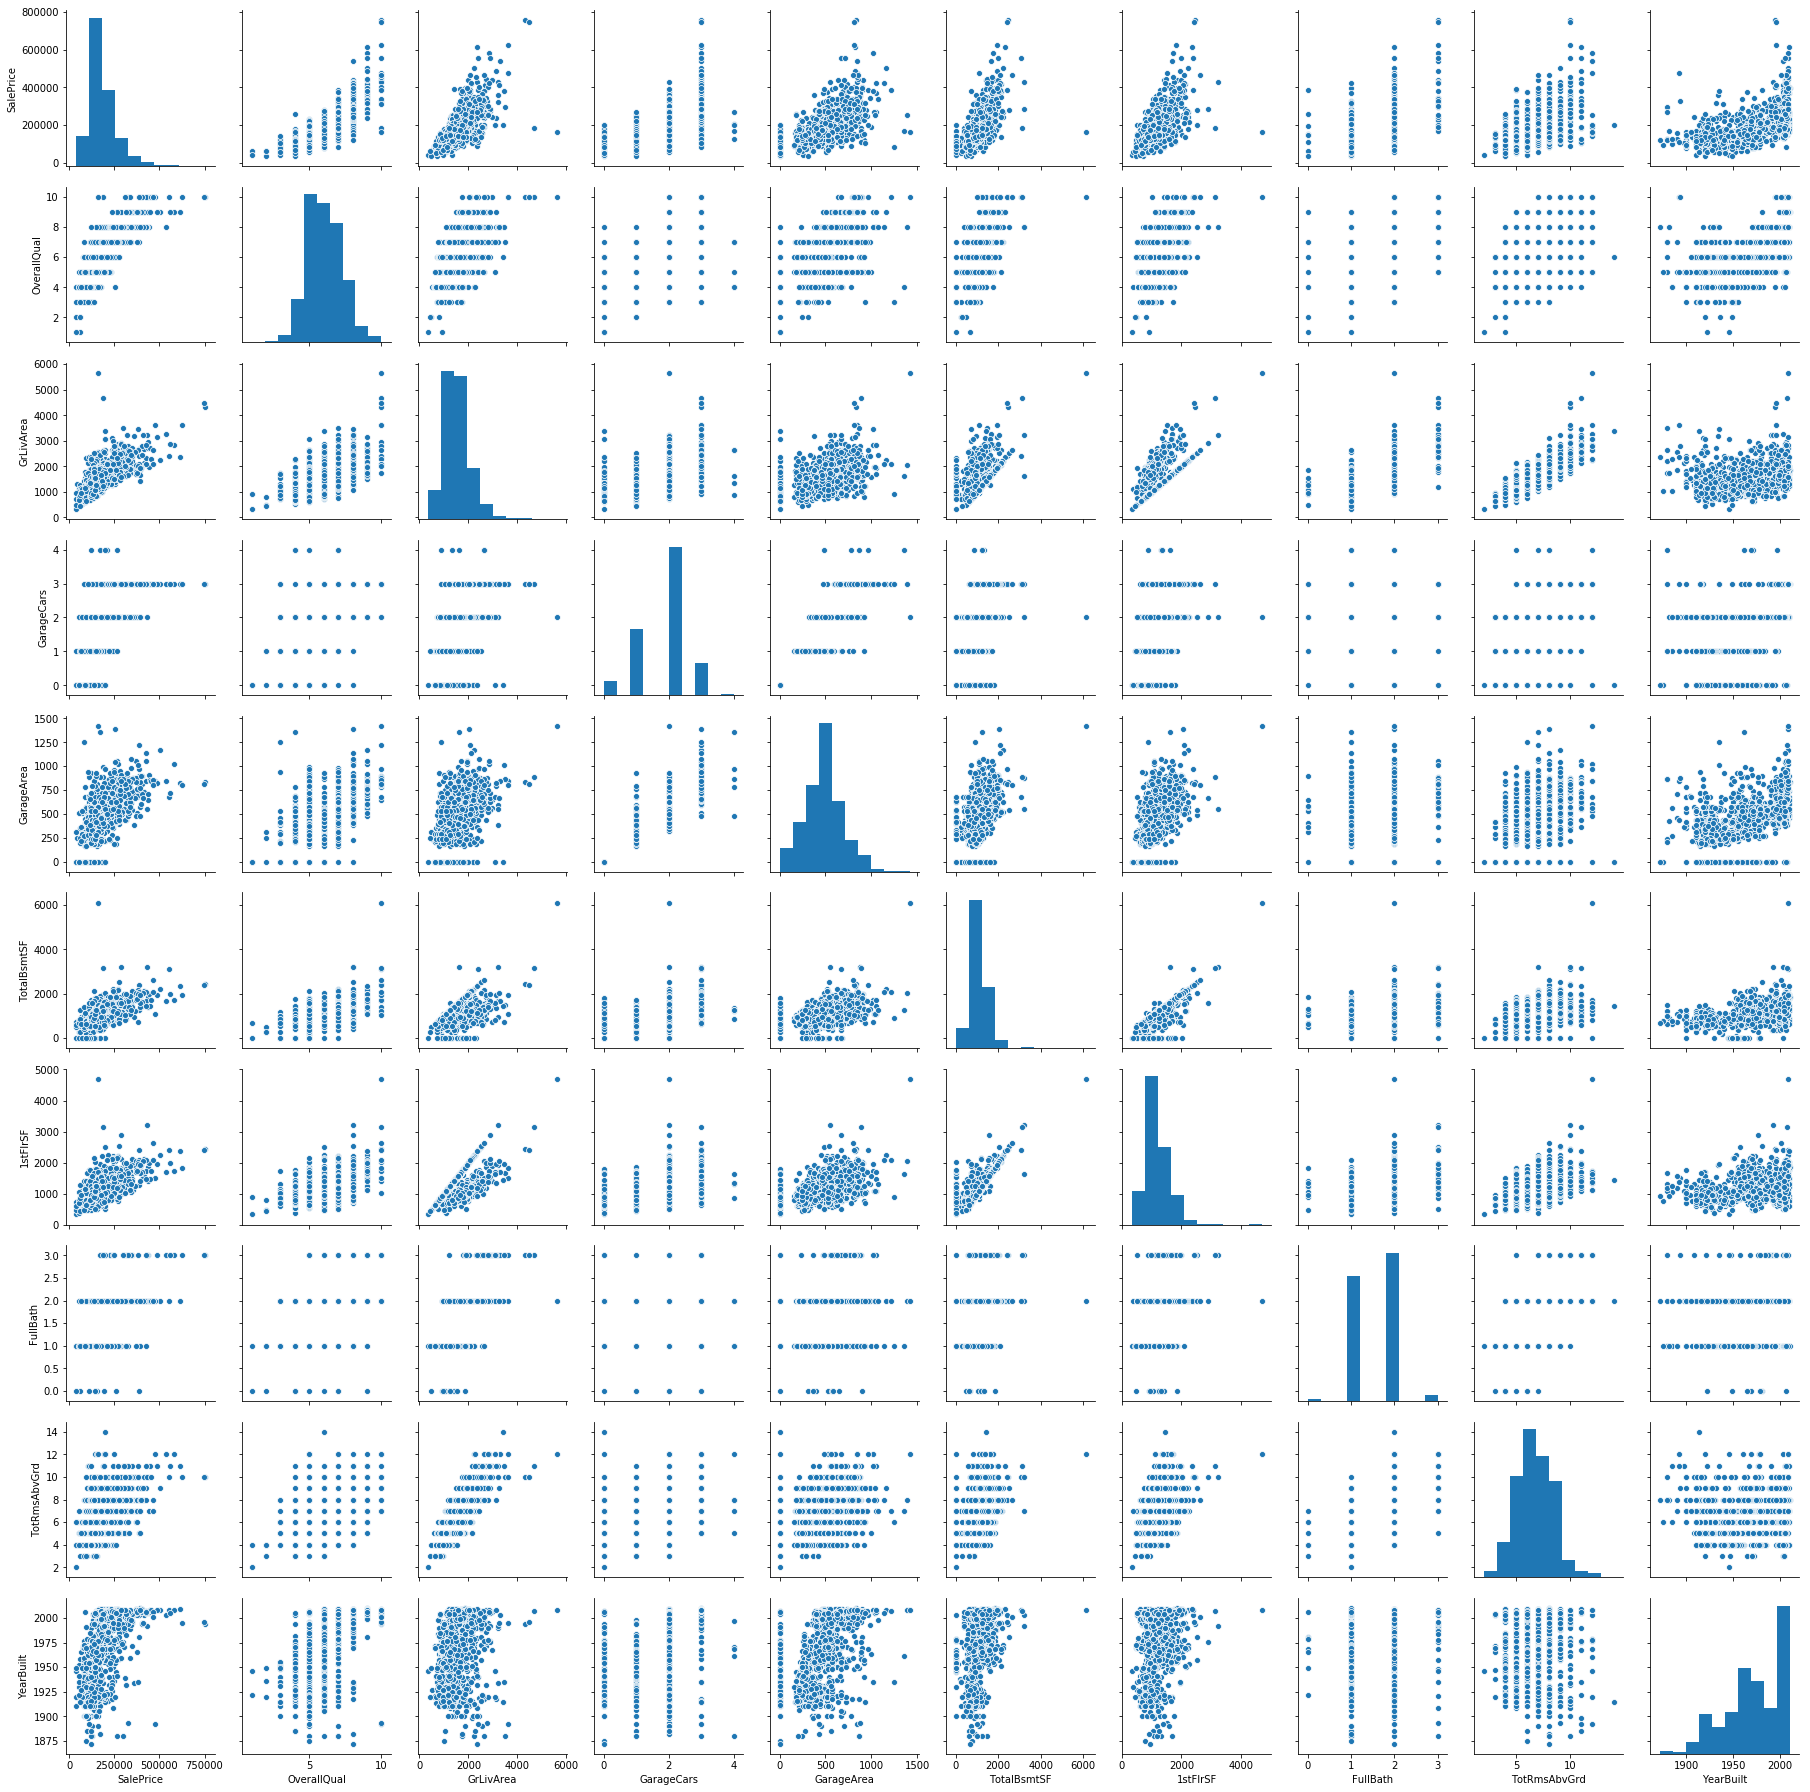

In [15]:
# Plotting the scatter plots for the above variables to observe the kind of relationship with the target variable
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF','FullBath', 'YearBuilt']
sns.pairplot(df[cols])

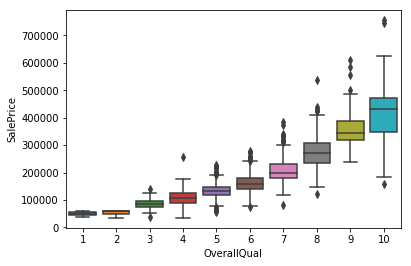

In [16]:
sns.boxplot(x="OverallQual", y='SalePrice', data = df)

As the overall quality increase the median sale price increases.

# Handiling null and missing values

In [17]:
null = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [18]:
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageCond,5.55
GarageFinish,5.55


In [19]:
# lets observe the columsn with highest percentage of missing values
print('The unique values in columsn with highest number if nan or missing values')
print('\n')
print('PoolQC: ',df['PoolQC'].unique())
print('\n')
print('MiscFeature: ',df['MiscFeature'].unique())
print('\n')
print('Alley: ',df['Alley'].unique())
print('\n')
print('Fence: ',df['Fence'].unique())
print('\n')
print('FireplaceQu: ',df['FireplaceQu'].unique())
print('\n')
print('LotFrontage: ',df['LotFrontage'].unique())
print('\n')
print('GarageCond: ',df['GarageCond'].unique())
print('\n')
print('GarageType: ',df['GarageType'].unique())
print('\n')
print('GarageYrBlt: ',df['GarageYrBlt'].unique())
print('\n')
print('GarageFinish: ',df['GarageFinish'].unique())
print('\n')
print('GarageQual: ',df['GarageQual'].unique())
print('\n')
print('BsmtExposure: ',df['BsmtExposure'].unique())
print('\n')
print('BsmtFinType2: ',df['BsmtFinType2'].unique())
print('\n')
print('BsmtFinType1: ',df['BsmtFinType1'].unique())
print('\n')
print('BsmtCond: ',df['BsmtCond'].unique())
print('\n')
print('BsmtQual: ',df['BsmtQual'].unique())
print('\n')
print('MasVnrArea: ',df['MasVnrArea'].unique())
print('\n')
print('MasVnrType: ',df['MasVnrType'].unique())
print('\n')
print('Electrical: ',df['Electrical'].unique())

The unique values in columsn with highest number if nan or missing values


PoolQC:  [nan 'Ex' 'Fa' 'Gd']


MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


Alley:  [nan 'Grvl' 'Pave']


Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


LotFrontage:  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


GarageCond:  ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


GarageType:  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


GarageYrBlt:  [

In [20]:
# we can impute the nan or missing values for each of the columns with missing values by analyzing their description

# for the columns below we will impute missing values with 'none' as these are categorical in nature
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

# for the LotFrontage columns we will impute the missing values with the median since the feature contains outliers
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# for the "garage" columns we will impute the null values with 'none'
for col in ('GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual'):
    df[col] = df[col].fillna('None')
    
# for the "Bsmt" columns we will impute the null values with 'none'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond','BsmtQual'):
    df[col] = df[col].fillna('None')
    
# MasVnrArea impute with 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# MasVnrType impute with 'None'
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# Electrical column inpute the missing value with Mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [21]:
# dropping any rows with null or missing values
df = df.dropna(axis=0)

In [22]:
# checking for the presence of any more null values
df.isnull().values.any()

False

In [23]:
print("Shape of dataframe is: ", df.shape)

Shape of dataframe is:  (1460, 80)


So we have the same number of rows and column as the original dataframe after taking care of null values.

In [24]:
# some of the numerical column are categorical in nature so will transform them

df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['OverallQual'] = df['OverallQual'].astype(str)
df['YearBuilt'] = df['YearBuilt'].astype(str)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(str)
df['BsmtFullBath'] = df['BsmtFullBath'].astype(str)
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype(str)
df['FullBath'] = df['FullBath'].astype(str)
df['HalfBath'] = df['HalfBath'].astype(str)
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype(str)
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype(str)
df['Fireplaces'] = df['Fireplaces'].astype(str)
df['GarageCars'] = df['GarageCars'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [25]:
# other columns to be removed

In [26]:
df['PoolArea'].value_counts() 

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [27]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [28]:
# we will drop the 'Pool Area' and 'MiscVal' column as it dominated by one value and it won't add any extra information to our model
df = df.drop(['PoolArea','MiscVal'],axis=1)

## Taking care of outliers

In [29]:
df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,2.866438,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,180921.195890
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.815778,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,2.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,3.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,3.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,8.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,755000.000000


In [30]:
df['GrLivArea'].describe() # outliers to be removed

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

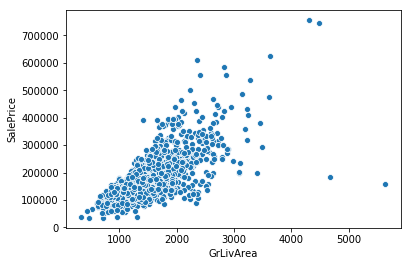

In [31]:
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'])

In [32]:
# removing outliers which have a value greater than 4000
df = df[df['GrLivArea']<4000]

In [33]:
df.shape

(1456, 78)

## Creating dummy variables

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,12,2008,WD,Normal,250000


In [35]:
# Categotical columns
df.select_dtypes(include='object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [36]:
# numeric columns
df.select_dtypes(exclude='object').columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [37]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
df.shape

(1456, 586)

## Splitting the data into train and test sets

In [39]:
y = df.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [40]:
X = df
X.shape

(1456, 585)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1100,60.0,8400,0.0,290,0,0,290,438,0,0,...,0,0,0,0,1,0,0,0,1,0
845,69.0,16647,0.0,1390,0,0,1390,1701,0,0,...,0,0,0,0,1,0,0,0,1,0
615,80.0,8800,156.0,763,0,173,936,1054,0,0,...,0,0,0,0,1,0,0,0,0,0
1323,50.0,5330,0.0,280,0,140,420,708,0,0,...,0,0,0,0,1,0,0,0,1,0
308,69.0,12342,0.0,262,0,599,861,861,0,0,...,0,0,0,0,1,0,0,0,1,0


In [44]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (975, 585)
X_test shape (481, 585)
y_train shape (975,)
y_test shape (481,)


## Scaling of numeric varaibles

In [45]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1100,60.0,8400,0.0,290,0,0,290,438,0,0,...,0,0,0,0,1,0,0,0,1,0
845,69.0,16647,0.0,1390,0,0,1390,1701,0,0,...,0,0,0,0,1,0,0,0,1,0
615,80.0,8800,156.0,763,0,173,936,1054,0,0,...,0,0,0,0,1,0,0,0,0,0
1323,50.0,5330,0.0,280,0,140,420,708,0,0,...,0,0,0,0,1,0,0,0,1,0
308,69.0,12342,0.0,262,0,599,861,861,0,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
y_train.head()

1100     60000
845     171000
615     137500
1323     82500
308      82500
Name: SalePrice, dtype: int64

In [47]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
497,60.0,9120,0.0,329,0,697,1026,1133,687,0,...,0,0,0,0,1,0,0,0,1,0
1264,34.0,4060,0.0,266,0,1139,1405,1337,0,0,...,0,0,0,0,0,0,0,0,0,0
411,100.0,34650,0.0,1056,0,0,1056,1056,0,0,...,0,0,0,0,1,0,0,0,1,0
1048,100.0,21750,75.0,0,0,0,0,1771,0,0,...,0,0,0,0,1,0,0,0,1,0
1035,69.0,11500,0.0,0,0,0,0,845,0,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
y_test.head()

497     184000
1264    181000
411     145000
1048    115000
1035     84000
Name: SalePrice, dtype: int64

In [49]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
      dtype='object')

In [50]:
num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

X_train[num_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
1100,60.0,8400,0.0,290,0,0,290,438,0,0,438,1,246,0,0,0,0,0
845,69.0,16647,0.0,1390,0,0,1390,1701,0,0,1701,3,611,0,0,0,0,0
615,80.0,8800,156.0,763,0,173,936,1054,0,0,1054,3,480,120,0,0,0,0
1323,50.0,5330,0.0,280,0,140,420,708,0,0,708,2,0,164,0,0,0,0
308,69.0,12342,0.0,262,0,599,861,861,0,0,861,1,539,158,0,0,0,0


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [53]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1100,-0.481867,-0.203629,-0.598695,-0.363688,-0.296207,-1.273850,-1.853072,-1.979046,-0.797206,-0.114012,...,0,0,0,0,1,0,0,0,1,0
845,-0.028616,0.521946,-0.598695,2.148649,-0.296207,-1.273850,0.792451,1.469038,-0.797206,-0.114012,...,0,0,0,0,1,0,0,0,1,0
615,0.525358,-0.168437,0.299648,0.716617,-0.296207,-0.883899,-0.299429,-0.297321,-0.797206,-0.114012,...,0,0,0,0,1,0,0,0,0,0
1323,-0.985479,-0.473729,-0.598695,-0.386527,-0.296207,-0.958283,-1.540419,-1.241926,-0.797206,-0.114012,...,0,0,0,0,1,0,0,0,1,0
308,-0.028616,0.143190,-0.598695,-0.427638,-0.296207,0.076326,-0.479805,-0.824225,-0.797206,-0.114012,...,0,0,0,0,1,0,0,0,1,0


## Model Building and Evaluation

### Ridge and Lasso Regression

#### Ridge

In [54]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [55]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    9.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [56]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 10.0}
-16138.27916644222


Optimim value of alpha is 10.0

In [57]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.34315396e+03,  6.36634080e+03,  5.55691089e+03,  8.59616710e+03,
        1.91353297e+03, -1.75202917e+02,  9.58158574e+03,  1.01376746e+04,
        8.75787819e+03, -8.05525768e+02,  1.53005309e+04, -2.97340746e+03,
        1.53623520e+03,  1.52395532e+03,  2.38735734e+03, -4.57386112e+01,
        1.70990028e+03,  2.43635953e+03, -3.47951194e+03, -1.11939544e+03,
       -4.49700216e+03,  4.61615020e+03, -4.15019598e+03,  2.97915558e+03,
        2.09637922e+03, -4.09082728e+03,  8.60400905e+03,  1.04996553e+03,
        3.92567845e+03,  3.27361924e+03, -3.64045633e+02, -3.49478545e+03,
        6.72226365e+03,  1.47063870e+03,  5.63592711e+03, -5.31349755e+02,
        8.43826105e+03,  8.70519078e+02,  4.92580807e+02,  3.65202427e+03,
        1.65191845e+03,  1.77058682e+03,  5.52248592e+03, -9.40294306e+03,
        1.27831192e+02, -1.83282106e+03,  1.31230100e+04, -5.04195886e+03,
       -1.05006716e+03,  2.43418863e+03, -3.88906770e+02, -1.21160225e+04,
        4.78449790e+02,  

#### Lasso

In [58]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   58.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [59]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 100}
-15821.85344193551


The optimum value of alpha is 100

In [60]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
lasso.coef_

array([ 6.58284840e+02,  6.14501375e+03,  4.15441909e+03,  8.05415974e+03,
        1.65325546e+03, -0.00000000e+00,  7.42457074e+03,  3.34300698e+03,
        0.00000000e+00, -1.36431729e+03,  2.45262221e+04, -2.67217725e+03,
        1.52364586e+03,  1.44432699e+03,  1.93092250e+03,  0.00000000e+00,
        1.58042892e+03,  1.76942931e+03, -1.15985991e+03, -0.00000000e+00,
       -0.00000000e+00,  6.83743662e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.23262216e+03,  1.21799978e+04,  0.00000000e+00,
        0.00000000e+00,  6.78186736e+03,  0.00000000e+00, -0.00000000e+00,
        7.45827127e+03,  0.00000000e+00,  4.62722003e+03, -0.00000000e+00,
        9.92600266e+03,  0.00000000e+00,  0.00000000e+00,  2.25596692e+03,
        0.00000000e+00,  2.23869306e+02,  0.00000000e+00, -9.09122624e+03,
        0.00000000e+00, -0.00000000e+00,  1.27890309e+04, -1.51513264e+03,
       -0.00000000e+00,  2.01485294e+03,  0.00000000e+00, -1.47249397e+04,
        0.00000000e+00,  

## Predictions

In [62]:
# ridge train pred
ridge_train_pred = ridge.predict(X_train)

In [63]:
# lasso train pred
lasso_train_pred = lasso.predict(X_train)

#### making predictions on the test set

In [64]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [65]:
# ridge predictions
ridge_pred = ridge.predict(X_test)

In [66]:
# lasso predictions
lasso_pred = lasso.predict(X_test)

## Model Evaluation

In [67]:
from sklearn.metrics import r2_score 

In [68]:
# model evaluation on the training set 
r2_score(y_train,ridge_train_pred)

0.9475810481411079

In [69]:
# model evaluation on the training set 
r2_score(y_train,lasso_train_pred)

0.9410653402901189

In [70]:
# ridge model evaluation for the test set
r2_score(y_test, ridge_pred)

0.9077216701978759

In [71]:
# lasso model evaluation for the test set
r2_score(y_test, lasso_pred)

0.9114034104052189

The r2_score of Lasso is slightly higher than ridge for the test dataset

Text(0, 0.5, 'ridge_pred')

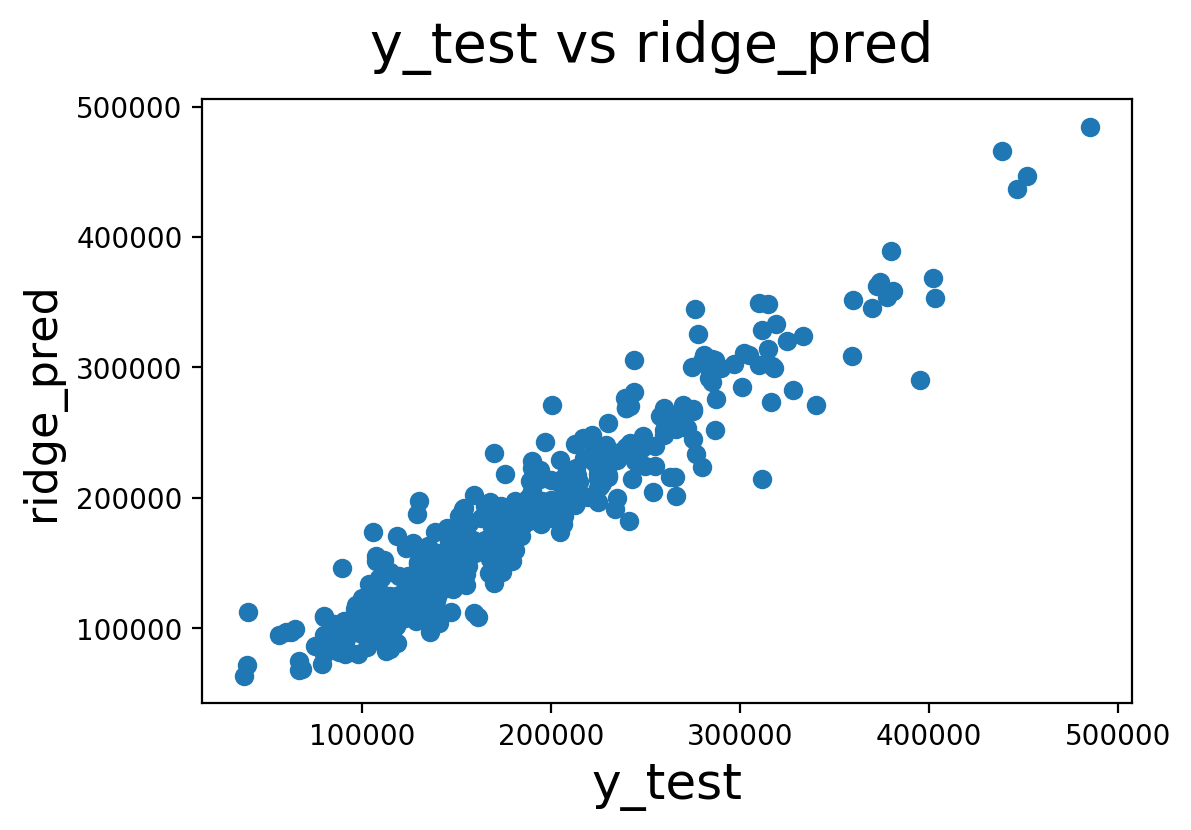

In [72]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=200)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  

Text(0, 0.5, 'lasso_pred')

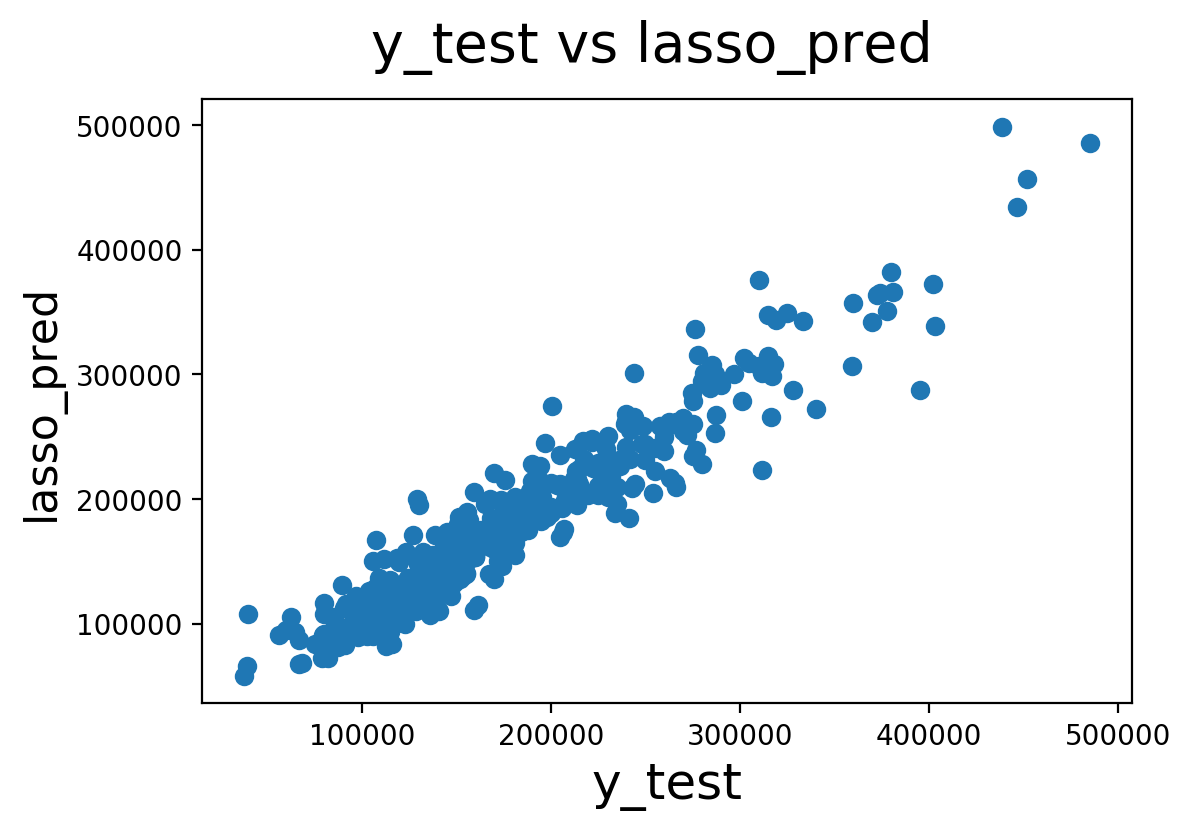

In [73]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=200)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  

#### Checking the Features that are most relevant using the Lasso model

In [74]:
lasso_non_zero_coef = lasso.coef_[lasso.coef_ != 0]

In [75]:
selected_features = X_train.columns[lasso.coef_ != 0]

In [76]:
selected_features

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       ...
       'MoSold_3', 'MoSold_5', 'MoSold_7', 'MoSold_9', 'YrSold_2008',
       'YrSold_2009', 'YrSold_2010', 'SaleType_New', 'SaleCondition_Alloca',
       'SaleCondition_Normal'],
      dtype='object', length=144)

In [77]:
lasso_feat_df = pd.DataFrame(lasso_non_zero_coef, index=selected_features, columns=['Value'])
lasso_feat_df = lasso_feat_df.sort_values(['Value'],ascending = False)

In [78]:
lasso_feat_df.head(20)

,Value
OverallQual_10,85290.874361
OverallQual_9,55729.125177
SaleType_New,27548.112704
Neighborhood_StoneBr,27027.710450
GrLivArea,24526.222104
Neighborhood_Crawfor,21108.624110
YearBuilt_2008,19312.686028
Exterior1st_BrkFace,19024.329033
OverallQual_8,17461.686164
FullBath_3,16821.610369
